In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import SpectralClustering
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [4]:
bto_df = pd.read_csv('../tissue_similarity/tissue_distances_bto.csv', index_col=0)

all_df_1K = pd.read_csv('../../results/tissue_distances_all_edges_top1000.csv', index_col=0)
gt_df_1K = pd.read_csv('../../results/tissue_distances_significant_groundtruth_top1000.csv', index_col=0)
approx_df_1K = pd.read_csv('../../results/tissue_distances_significant_approx_top1000.csv', index_col=0)

all_df = pd.read_csv('../../results/tissue_distances_all_edges.csv', index_col=0)
gt_df = pd.read_csv('../../results/tissue_distances_significant_groundtruth.csv', index_col=0)
approx_df = pd.read_csv('../../results/tissue_distances_significant_approx.csv', index_col=0)


In [5]:
# Extract upper triangular values of each distance matrix.
bto_idx = np.triu_indices_from(bto_df, k=1)
bto_dists = bto_df.values[bto_idx]

all_idx = np.triu_indices_from(all_df, k=1)
all_dists = all_df.values[all_idx]

gt_idx = np.triu_indices_from(gt_df, k=1)
gt_dists = gt_df.values[gt_idx]

approx_idx = np.triu_indices_from(approx_df, k=1)
approx_dists = approx_df.values[approx_idx]

# Extract upper triangular values of distance matrix based on top 1000 highest expressed genes.
all_idx_1K = np.triu_indices_from(all_df_1K, k=1)
all_dists_1K = all_df_1K.values[all_idx_1K]

gt_idx_1K = np.triu_indices_from(gt_df_1K, k=1)
gt_dists_1K = gt_df_1K.values[gt_idx_1K]

approx_idx_1K = np.triu_indices_from(approx_df_1K, k=1)
approx_dists_1K = approx_df_1K.values[approx_idx_1K]

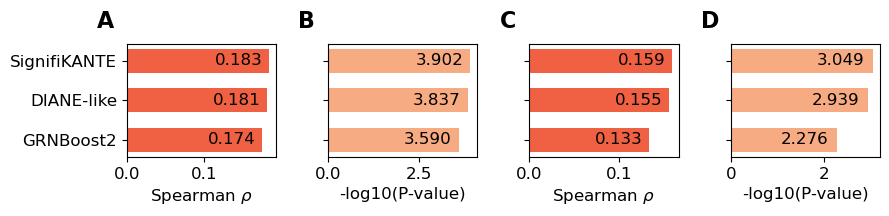

In [41]:
fig, axs = plt.subplot_mosaic([['A', 'B', 'C', 'D']])
fig.set_size_inches(9, 2.5)
axs_list = list(axs.values())
label_fontsize = 12

### Correlations coeff. and pvalues on all genes.
corr_all = spearmanr(bto_dists, all_dists)[0]
corr_gt = spearmanr(bto_dists, gt_dists)[0]
corr_approx = spearmanr(bto_dists, approx_dists)[0]
pvalue_all = spearmanr(bto_dists, all_dists)[1]
pvalue_gt = spearmanr(bto_dists, gt_dists)[1]
pvalue_approx = spearmanr(bto_dists, approx_dists)[1]

### Correlation coeff. and pvalues on top 1000 highest expressed genes.
corr_all_1K = spearmanr(bto_dists, all_dists_1K)[0]
corr_gt_1K = spearmanr(bto_dists, gt_dists_1K)[0]
corr_approx_1K = spearmanr(bto_dists, approx_dists_1K)[0]
pvalue_all_1K = spearmanr(bto_dists, all_dists_1K)[1]
pvalue_gt_1K = spearmanr(bto_dists, gt_dists_1K)[1]
pvalue_approx_1K = spearmanr(bto_dists, approx_dists_1K)[1]

### PLOT A

# Prepare data
labels_bar = [
    "GRNBoost2", 
    "DIANE-like", 
    "SignifiKANTE"
]
correlations = [corr_all, corr_gt, corr_approx]

ax = axs['A']

rocket_colors = sns.color_palette("rocket", 5)
bar_color = rocket_colors[3]

# Make horizontal bars
bars = ax.barh(labels_bar, correlations, color=bar_color, height=0.6)

# Annotate bars with correlation values
for bar in bars:
    width = bar.get_width()
    ax.text(
        width-0.07,                 # position text just to the right of the bar
        bar.get_y() + bar.get_height()/2,
        f'{width:.3f}',
        ha='left', va='center',
        fontsize=label_fontsize
    )

# Label axes and adjust ticks
ax.set_xlabel(r"Spearman $\rho$", fontsize=label_fontsize)

ax.tick_params(axis='y', labelsize=label_fontsize)
ax.tick_params(axis='x', labelsize=label_fontsize)


### PLOT B.

# Prepare data
labels_bar = [
    "GRNBoost2", 
    "DIANE-like", 
    "SignifiKANTE"
]
correlations = [-np.log10(pvalue_all), -np.log10(pvalue_gt), -np.log10(pvalue_approx)]

ax = axs['B']

rocket_colors = sns.color_palette("rocket", 5)
bar_color = rocket_colors[4]  # index 0=lightest, 4=darkest
# Make horizontal bars
bars = ax.barh(labels_bar, correlations, color=bar_color, height=0.6)

# Annotate bars with correlation values
for bar in bars:
    width = bar.get_width()
    ax.text(
        width-1.5,                 # position text just to the right of the bar
        bar.get_y() + bar.get_height()/2,
        f'{width:.3f}',
        ha='left', va='center',
        fontsize=label_fontsize
    )

# Label axes and adjust ticks
ax.set_xlabel("-log10(P-value)", fontsize=label_fontsize)
ax.set_ylabel("")
ax.set_yticklabels([])
ax.tick_params(axis='y', labelsize=label_fontsize)
ax.tick_params(axis='x', labelsize=label_fontsize)

### PLOT C.

# Prepare data
# Prepare data
# Prepare data
labels_bar = [
    "GRNBoost2", 
    "DIANE-like", 
    "SignifiKANTE"
]
correlations = [corr_all_1K, corr_gt_1K, corr_approx_1K]

ax = axs['C']

rocket_colors = sns.color_palette("rocket", 5)
bar_color = rocket_colors[3]

# Make horizontal bars
bars = ax.barh(labels_bar, correlations, color=bar_color, height=0.6)

# Annotate bars with correlation values
for bar in bars:
    width = bar.get_width()
    ax.text(
        width-0.06,                 # position text just to the right of the bar
        bar.get_y() + bar.get_height()/2,
        f'{width:.3f}',
        ha='left', va='center',
        fontsize=label_fontsize
    )

# Label axes and adjust ticks
ax.set_xlabel(r"Spearman $\rho$", fontsize=label_fontsize)
ax.set_ylabel("")
ax.set_yticklabels([])
ax.tick_params(axis='y', labelsize=label_fontsize)
ax.tick_params(axis='x', labelsize=label_fontsize)


### PLOT D.

# Prepare data
labels_bar = [
    "GRNBoost2", 
    "DIANE-like", 
    "SignifiKANTE"
]
correlations = [-np.log10(pvalue_all_1K), -np.log10(pvalue_gt_1K), -np.log10(pvalue_approx_1K)]

ax = axs['D']

rocket_colors = sns.color_palette("rocket", 5)
bar_color = rocket_colors[4]  # index 0=lightest, 4=darkest
# Make horizontal bars
bars = ax.barh(labels_bar, correlations, color=bar_color, height=0.6)

# Annotate bars with correlation values
for bar in bars:
    width = bar.get_width()
    ax.text(
        width-1.2,                 # position text just to the right of the bar
        bar.get_y() + bar.get_height()/2,
        f'{width:.3f}',
        ha='left', va='center',
        fontsize=label_fontsize
    )

# Label axes and adjust ticks
ax.set_xlabel("-log10(P-value)", fontsize=label_fontsize)
ax.set_ylabel("")
ax.set_yticklabels([])
ax.tick_params(axis='y', labelsize=label_fontsize)
ax.tick_params(axis='x', labelsize=label_fontsize)

    
labels = {'A': 'A', 'B': 'B', 'C': 'C', 'D' : 'D'}

for key, label in labels.items():
    ax = axs[key]
    ax.text(
        -0.2, 1.3, label,  # x, y (in axes fraction coords)
        transform=ax.transAxes,
        fontsize=16,
        fontweight='bold',
        va='top',
        ha='left'
    )
   
fig.tight_layout()
fig.subplots_adjust(hspace=0.25, wspace=0.35)
plt.savefig("results_brenda_tissue_ontology.pdf")